In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('../base_dados/beber_sem_duplicata.csv', low_memory=False)


### Quantitativos

Acurácia: 0.6970035491941584
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71     84709
           1       0.73      0.65      0.68     87161

    accuracy                           0.70    171870
   macro avg       0.70      0.70      0.70    171870
weighted avg       0.70      0.70      0.70    171870

Matriz de Confusão (Texto):
 [[63279 21430]
 [30646 56515]]


Resultados salvos com sucesso.


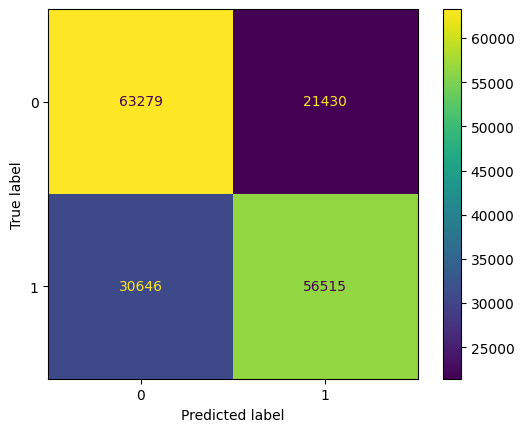

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Separar features e target
X = df.drop(columns=['drk_yn'])
y = df['drk_yn']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prever e avaliar
y_pred = gnb.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", report)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Texto):\n", cm)

# Salvar acurácia e relatório em CSV
resultados = pd.DataFrame({
    'Modelo': ['Naive Bayes'],
    'Acurácia': [accuracy]
})

# Salvar relatório de classificação como arquivo de texto
with open('../base_dados/resultados_mineracao_dados/relatorio_classificacao_naive_bayes_quantitativo_sem_duplicata.txt', 'w') as f:
    f.write("Relatório de Classificação:\n")
    f.write(report)

# Salvar matriz de confusão
# cm_df = pd.DataFrame(cm, index=[f'Classe {i}' for i in range(len(cm))], columns=[f'Classe {i}' for i in range(len(cm))])
# cm_df.to_csv('../base_dados/resultados_mineracao_dados/matriz_confusao_naive_bayes_sem_duplicata.csv', index=True)

# Salvar acurácia em CSV
resultados.to_csv('../base_dados/resultados_mineracao_dados/resultado_naive_bayes_quantitativo_sem_duplicata.csv', index=False)

# Exibir matriz de confusão graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Resultados salvos com sucesso.")


### Qualitativos

Acurácia: 0.7026240763367662
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70     84709
           1       0.71      0.71      0.71     87161

    accuracy                           0.70    171870
   macro avg       0.70      0.70      0.70    171870
weighted avg       0.70      0.70      0.70    171870



Matriz de Confusão (Texto):
 [[59257 25452]
 [25658 61503]]
Resultados salvos com sucesso.


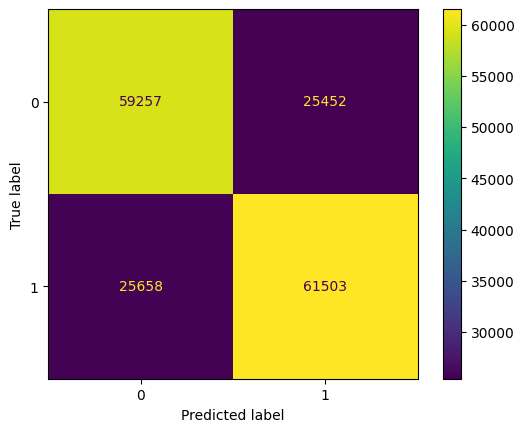

In [3]:
# Converter todos os dados para string
df = df.astype(str)

# Separar atributos e rótulo
X = df.drop(columns=['drk_yn'])
y = df['drk_yn']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Codificar com LabelEncoder
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

# Criar e treinar o modelo
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

# Prever e avaliar
y_pred = cnb.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Relatório de Classificação:\n", report)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (Texto):\n", cm)

# Salvar acurácia e relatório em CSV
resultados = pd.DataFrame({
    'Modelo': ['Categorical Naive Bayes'],
    'Acurácia': [accuracy]
})

# Salvar relatório de classificação como arquivo de texto
with open('../base_dados/resultados_mineracao_dados/relatorio_classificacao_naive_bayes_qualitativo_sem_duplicata.txt', 'w') as f:
    f.write("Relatório de Classificação:\n")
    f.write(report)

# Salvar matriz de confusão
# cm_df = pd.DataFrame(cm, index=[f'Classe {i}' for i in range(len(cm))], columns=[f'Classe {i}' for i in range(len(cm))])
# cm_df.to_csv('../base_dados/resultados_mineracao_dados/matriz_confusao_naive_bayes_qualitativo_sem_duplicata.csv', index=True)

# Salvar acurácia em CSV
resultados.to_csv('../base_dados/resultados_mineracao_dados/resultado_naive_bayes_qualitativo_sem_duplicata.csv', index=False)

# Exibir matriz de confusão graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Resultados salvos com sucesso.")

In [4]:
# cm_df = pd.DataFrame(cm, index=[f'Classe {i}' for i in range(len(cm))], columns=[f'Classe {i}' for i in range(len(cm))])
# cm_df.to_csv('../base_dados/resultados_mineracao_dados/matriz_confusao_naive_bayes_sem_duplicata.csv', index=True)